# Unsupervised Learning Algorithms
In this notebook, several unsupervised learning algorithms are used to create binary classifiers that distinguish between benign and malicious traffics in the ids-2017 dataset. The results are compared to the metrics of the supervised learning model and prepare for the active learning implementation.

In [1]:
from notebook_utils import load_processed_dataset_2017, plot_confusion_matrix, metrics_report, upsample_dataset, extract_and_plot_metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, average_precision_score, make_scorer, precision_score, accuracy_score, confusion_matrix
from notebook_utils import upsample_dataset
%matplotlib inline
%load_ext autoreload
%autoreload 2
file_path = r"CIC-IDS-2017\CSVs\GeneratedLabelledFlows\TrafficLabelling\processed\ids2017_processed.csv"

In [2]:
X_train, Y_train, X_eval, Y_eval, X_test, Y_test, scaler = load_processed_dataset_2017(file_path)
# Combine the training, evaluation, and test sets for unsupervised learning
X_combined = np.vstack((X_train, X_eval, X_test))

In [3]:
performance_models = {}

In [4]:
import joblib

def save_model(model, model_name):
    file_path = f'models/{model_name}.pkl'
    joblib.dump(model, file_path)
    print(f'Model saved to {file_path}')

def load_model(model_name):
    file_path = f'models/{model_name}.pkl'
    model = joblib.load(file_path)
    print(f'Model loaded from {file_path}')
    return model

os.makedirs('models', exist_ok=True)

## K-Means Clustering

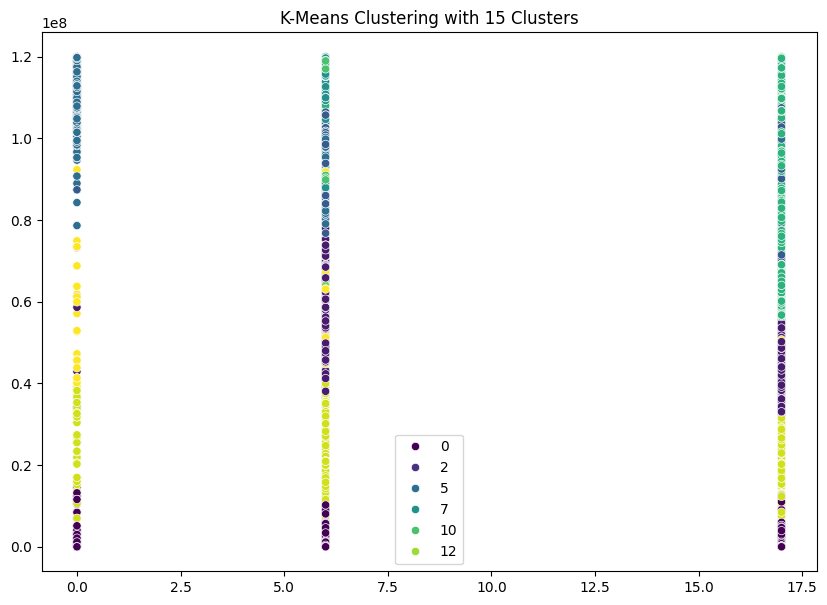

In [5]:
from sklearn.cluster import KMeans

# Fit the K-Means model with 15 clusters
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(X_combined)

# Predict the cluster for each data point
y_kmeans = kmeans.predict(X_combined)

# Add the cluster as a new column to the combined dataset
df_combined = pd.DataFrame(X_combined, columns=[f'feature_{i}' for i in range(X_combined.shape[1])])
df_combined['kmeans_cluster'] = y_kmeans

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_combined[:, 0], y=X_combined[:, 1], hue=y_kmeans, palette='viridis')
plt.title("K-Means Clustering with 15 Clusters")
plt.show()
